# Normalization

When we use KMeans, something to consider is that since we are using euclidean distance, if we have certain features with much higher variance, there will be an outsized impact from them. For example, the data we create below has two features but one is a much larger range of data. Look what happens when we try to use KMeans.

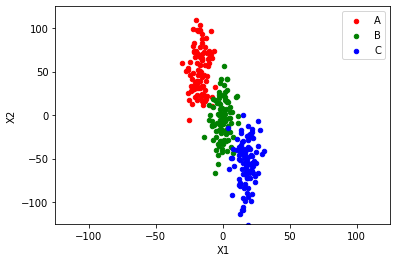

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Set the random seed
np.random.seed(0)

#Create the data
A = pd.DataFrame(np.hstack([np.random.normal(-17.5,5, (100,1)),np.random.normal(50,25, (100,1))]),columns=['X1', 'X2'])
B = pd.DataFrame(np.hstack([np.random.normal(0,5, (100,1)),np.random.normal(0,25, (100,1))]),columns=['X1', 'X2'])
C = pd.DataFrame(np.hstack([np.random.normal(17.5,5, (100,1)),np.random.normal(-50,25, (100,1))]),columns=['X1', 'X2'])

#Plot the data
fig, ax = plt.subplots()
A.plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
B.plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
C.plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')
plt.xlim([-125, 125])
plt.ylim([-125, 125])
plt.show()

In [2]:
from sklearn.cluster import KMeans

#Get the data
X = pd.concat([A,B,C])

#Fit the model
model = KMeans(n_clusters=3, random_state=1).fit(X)

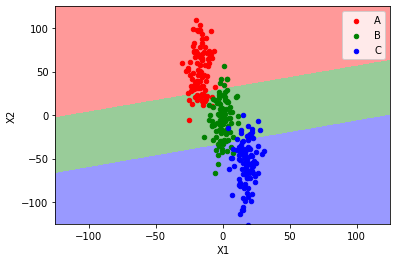

In [3]:
from matplotlib import colors

#Grab all the x and y points
x_grid, y_grid = np.meshgrid(np.linspace(-125, 125, 1000), np.linspace(-125, 125, 1000))

#Grab the colors we want to map to
cmap = colors.ListedColormap(['red','blue','green'])

#Predict and reshape
z = model.predict(np.vstack([x_grid.ravel(), y_grid.ravel()]).T)
z = z.reshape(x_grid.shape)

#Set up our plots
fig, ax = plt.subplots()

#Plot all the actual data
A.plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
B.plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
C.plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')

#Plot the regions
ax.imshow(z, interpolation='nearest',
           extent=(-125, 125, -125, 125),
           cmap=cmap,
           alpha=.4,
           aspect='auto', origin='lower')

plt.show()

## Applying a Normalization

We see that our model doesn't do a great job of classifying our points. A lot of this is because of how different the two features are. A way to fix this would be to take the data we have and standardize it to instead be in relation to standard deviations away from the mean. This controls for both the mean and the variance of different features. The first step would be to find mu and std.

In [4]:
#Find mu
mu = X.mean()

#Find std
std = X.std()

Now we can scale all the different data points by subtracting the mean and dividing by the standard deviation.

In [5]:
#Scale the X features
X_scaled = (X - mu) / std
print(X_scaled)

          X1        X2
0  -0.576371  1.977956
1  -1.030257  0.375923
2  -0.837713  0.414239
3  -0.417684  1.524875
4  -0.541925  0.462516
..       ...       ...
95  1.141483 -0.751137
96  0.946926 -1.172243
97  0.994954 -1.046644
98  0.827293 -1.400393
99  1.140175 -1.027732

[300 rows x 2 columns]


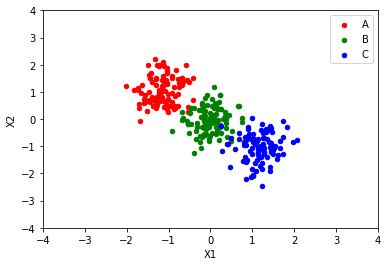

In [6]:
#Plot the scaled data
fig, ax = plt.subplots()

X_scaled[:100].plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
X_scaled[100:200].plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
X_scaled[200:300].plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

Of course, we also can easily convert from scaled back to the original by doing the opposite. This is helpful because it means that we can build our KMeans model on scaled points, then switch it back to the nominal version.

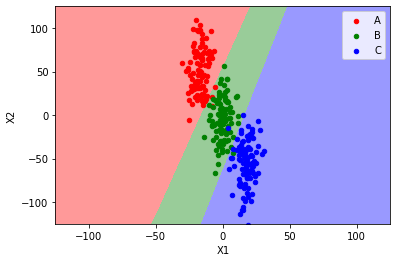

In [7]:
#Fit the model
model = KMeans(n_clusters=3, random_state=1).fit(X_scaled)

#Convert the grids to be scaled 
x_grid_scaled = (x_grid - mu[0]) / std[0]
y_grid_scaled = (y_grid - mu[1]) / std[1]

#Grab the colors we want to map to
cmap = colors.ListedColormap(['green', 'blue', 'red'])

#Predict and reshape
z = model.predict(np.vstack([x_grid_scaled.ravel(), y_grid_scaled.ravel()]).T)
z = z.reshape(x_grid.shape)

#Set up our plots
fig, ax = plt.subplots()

#Plot all the actual data
A.plot.scatter(x='X1', y='X2', label='A', ax=ax, color='red')
B.plot.scatter(x='X1', y='X2', label='B', ax=ax, color='green')
C.plot.scatter(x='X1', y='X2', label='C', ax=ax, color='blue')

#Plot the regions
ax.imshow(z, interpolation='nearest',
           extent=(-125, 125, -125, 125),
           cmap=cmap,
           alpha=.4,
           aspect='auto', origin='lower')

plt.show()

Now we see much better classification because the data has been normalized!